### This is the demo to compare the optimization methods including SGD, momentum, Nesterov, AdaGrad, RMSProp and Adam
#### Question:
&emsp;&emsp;If we have some data points $\boldsymbol{X}$ and corresponding $\boldsymbol{y}$ and we know that $\boldsymbol{y}$ can be generated by $f(\boldsymbol{x}) = \boldsymbol{w \cdot x}+ b$ plus some noise. Now we want to calculate $\boldsymbol{w}$ and $b$ of original mapping as $f$. 

&emsp;&emsp;Below we use Python and Numpy to implement 6 algorithms and visualize loss results by plotting with Matplotlib.

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import load_diabetes

In [2]:
# define some basic functions
def shuffle(X, y):
    '''
    each line of X is one record
    each line of y is label
    return the shuffled X and y
    '''
    tmp = np.column_stack((X,y))
    np.random.shuffle(tmp)
    return tmp[:, :-1], tmp[:, -1]
def get_minibatch(X, y, minibatch_size):
    '''
    X as the feature, y as label
    minibatch_size as the size of each small batch
    return a list containing small batches
    '''
    batches = []
    X, y = shuffle(X, y)
    for i in range(0, X.shape[0], minibatch_size):
        X_part = X[i:i + minibatch_size]
        y_part = y[i:i + minibatch_size]
        batches.append((X_part, y_part))
    return batches

In [3]:
# define the standard SGD function
def SGD(batches, n_iter, w, b):
    for i in range(1, n_iter + 1):
        for j in range(len(batches)):
            x_mini, y_mini = batches[j]   # x_mini dim mini*nf
            delta = np.dot(x_mini, w) + b - y_mini  # dim mini*1
            loss['sgd'].append((delta*delta).mean())
            w = w - eps*(np.dot(x_mini.T, delta))/x_mini.shape[0]
            b = b - eps*delta.mean()
        # end for
    # end for

In [4]:
# define SGD with momentum
def momentum(batches, n_iter, w, b):
    alpha = 1e-2    # momentum hyperparameters
    velocity = np.zeros_like(w)  # the velocity term
    for i in range(1, n_iter + 1):
        for j in range(len(batches)):
            x_mini, y_mini = batches[j]   # x_mini dim mini*nf
            delta = np.dot(x_mini, w) + b - y_mini  # dim mini*1
            loss['momentum'].append((delta*delta).mean())
            velocity = alpha*velocity - eps*(np.dot(x_mini.T, delta))/x_mini.shape[0]
            w = w + velocity
            b = b - eps*delta.mean()
        # end for
    # end for

In [5]:
# define SGD with nesterov momentum
def nesterov(batches, n_iter, w, b):
    alpha = 1e-2    # momentum hyperparameters
    velocity = np.zeros_like(w)  # the velocity term
    for i in range(1, n_iter + 1):
        for j in range(len(batches)):
            x_mini, y_mini = batches[j]   # x_mini dim mini*nf
            delta = np.dot(x_mini, w + alpha*velocity) + b - y_mini  # dim mini*1
            loss['nesterov'].append((delta*delta).mean())
            velocity = alpha*velocity - eps*(np.dot(x_mini.T, delta))/x_mini.shape[0]
            w = w + velocity
            b = b - eps*delta.mean()
        # end for
    # end for

In [6]:
# define adagrad
def adagrad(batches, n_iter, w, b):
    #eps = 1e-3
    deltaa = 1e-7
    r = np.zeros_like(w)  # the accumulative term
    for i in range(1, n_iter + 1):
        for j in range(len(batches)):
            x_mini, y_mini = batches[j]   # x_mini dim mini*nf
            delta = np.dot(x_mini, w) + b - y_mini  # dim mini*1
            loss['adagrad'].append((delta*delta).mean())
            g = (np.dot(x_mini.T, delta))/x_mini.shape[0]
            r = r + g*g
            dw = -eps*g/(deltaa + np.sqrt(r))
            w = w + dw
            b = b - eps*delta.mean()
        # end for
    # end for

In [7]:
# define rmsprop
def rmsprop(batches, n_iter, w, b):
    #eps = 1e-2
    rho = 0.09      # for rmsprop
    deltaa = 1e-6
    r = np.zeros_like(w)  # the accumulative term
    for i in range(1, n_iter + 1):
        for j in range(len(batches)):
            x_mini, y_mini = batches[j]   # x_mini dim mini*nf
            delta = np.dot(x_mini, w) + b - y_mini  # dim mini*1
            loss['rmsprop'].append((delta*delta).mean())
            g = (np.dot(x_mini.T, delta))/x_mini.shape[0]
            r = rho*r + (1.0-rho)*g*g
            dw = -eps*g/np.sqrt(r+deltaa)
            w = w + dw
            b = b - eps*delta.mean()
        # end for
    # end for

In [8]:
# define adam
def adam(batches, n_iter, w, b):
    #eps = 1e-2  # recommended values
    rho1 = 0.9
    rho2 = 0.999
    deltaa = 1e-8
    s = np.zeros_like(w)  # the accumulative term
    r = np.zeros_like(w)  # the accumulative term
    t = 0                 # initialize time step
    for i in range(1, n_iter + 1):
        for j in range(len(batches)):
            x_mini, y_mini = batches[j]   # x_mini dim mini*nf
            delta = np.dot(x_mini, w) + b - y_mini  # dim mini*1
            loss['adam'].append((delta*delta).mean())
            g = (np.dot(x_mini.T, delta))/x_mini.shape[0]
            t = t + 1
            s = rho1*s + (1.0 - rho1)*g
            r = rho2*r + (1.0 - rho2)*(g*g)
            s_hat = s/(1.0 - rho1**t)
            r_hat = r/(1.0 - rho2**t)
            dw = -eps*s_hat/(np.sqrt(r_hat)+deltaa)
            w = w + dw
            b = b - eps*delta.mean()
        # end for
    # end for
    

In [92]:
# set the size of training data or input training data
n_example = 40000
minibatch_size = 400
n_iter = 4
n_run = int(n_iter*n_example/minibatch_size + 1)

# dataset 1: manually created datasets
'''
# initialize these data
n_feature = 10
X = np.random.uniform(-100, 100, (n_example, n_feature))
y = np.dot(X, w_real) + b_real + np.random.random((n_example, 1))
'''

# dataset 2: rom sklearn make_moons

n_feature = 2
X, y = make_moons(n_samples=n_example, random_state=42, noise=0.1)



'''
# dataset 3: from sklearn load_diabetes, change n_example to 400 above
n_feature = 10
X, y = load_diabetes(return_X_y=True)
X = X[:400]
y = y[:400].reshape((X.shape[0], 1))
'''


# init model parameters
b_real = np.random.random()
w_real = np.random.random((n_feature, 1))
w = np.random.random((n_feature, 1))
b = np.random.random()


# initalize some parameters for algorithms
eps = 5e-3    # step size
#alpha = 1e-2    # momentum hyperparameters
#deltaa = 1e-7   # for adgrad

# initialize a dict to record the loss data of each algorithm
loss = {'sgd': [],
        'momentum': [],
        'nesterov': [],
        'adagrad': [],
        'rmsprop': [],
        'adam': []}

In [93]:
print(X.shape)
print(y.shape)

(40000, 2)
(40000,)


In [94]:
# initialzie the minitbatches for every algorithms
batches = get_minibatch(X, y, minibatch_size)

# perform calculations
SGD(batches=batches, n_iter=n_iter, w=w, b=b)
momentum(batches=batches, n_iter=n_iter, w=w, b=b)
nesterov(batches=batches, n_iter=n_iter, w=w, b=b)
adagrad(batches=batches, n_iter=n_iter, w=w, b=b)
rmsprop(batches=batches, n_iter=n_iter, w=w, b=b)
adam(batches=batches, n_iter=n_iter, w=w, b=b)

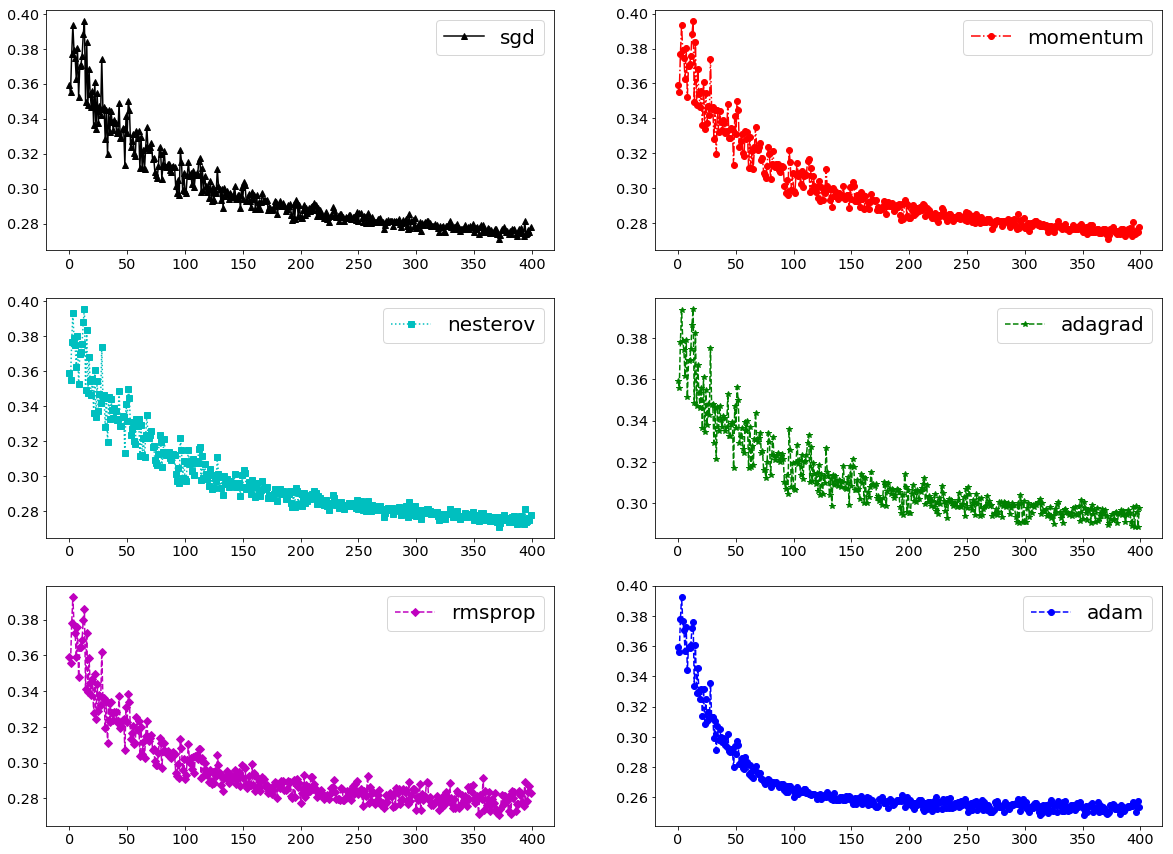

In [95]:
# global figure parameters setting
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# plot all the loss traces separately
plt.clf
plt.subplot(3,2,1)
plt.plot(loss['sgd'], '-k^',label='sgd')
plt.legend(loc='best', fontsize = 20)
plt.subplot(3,2,2)
plt.plot(loss['momentum'], '-.ro',label='momentum')
plt.legend(loc='best', fontsize = 20)
plt.subplot(3,2,3)
plt.plot(loss['nesterov'], ':cs', label='nesterov')
plt.legend(loc='best', fontsize = 20)
plt.subplot(3,2,4)
plt.plot(loss['adagrad'], '--g*',label='adagrad')
plt.legend(loc='best', fontsize = 20)
plt.subplot(3,2,5)
plt.plot(loss['rmsprop'], '--mD', label='rmsprop')
plt.legend(loc='best', fontsize = 20)
plt.subplot(3,2,6)
plt.plot(loss['adam'],'--bo', label='adam')
plt.legend(loc='best', fontsize = 20)
plt.show()

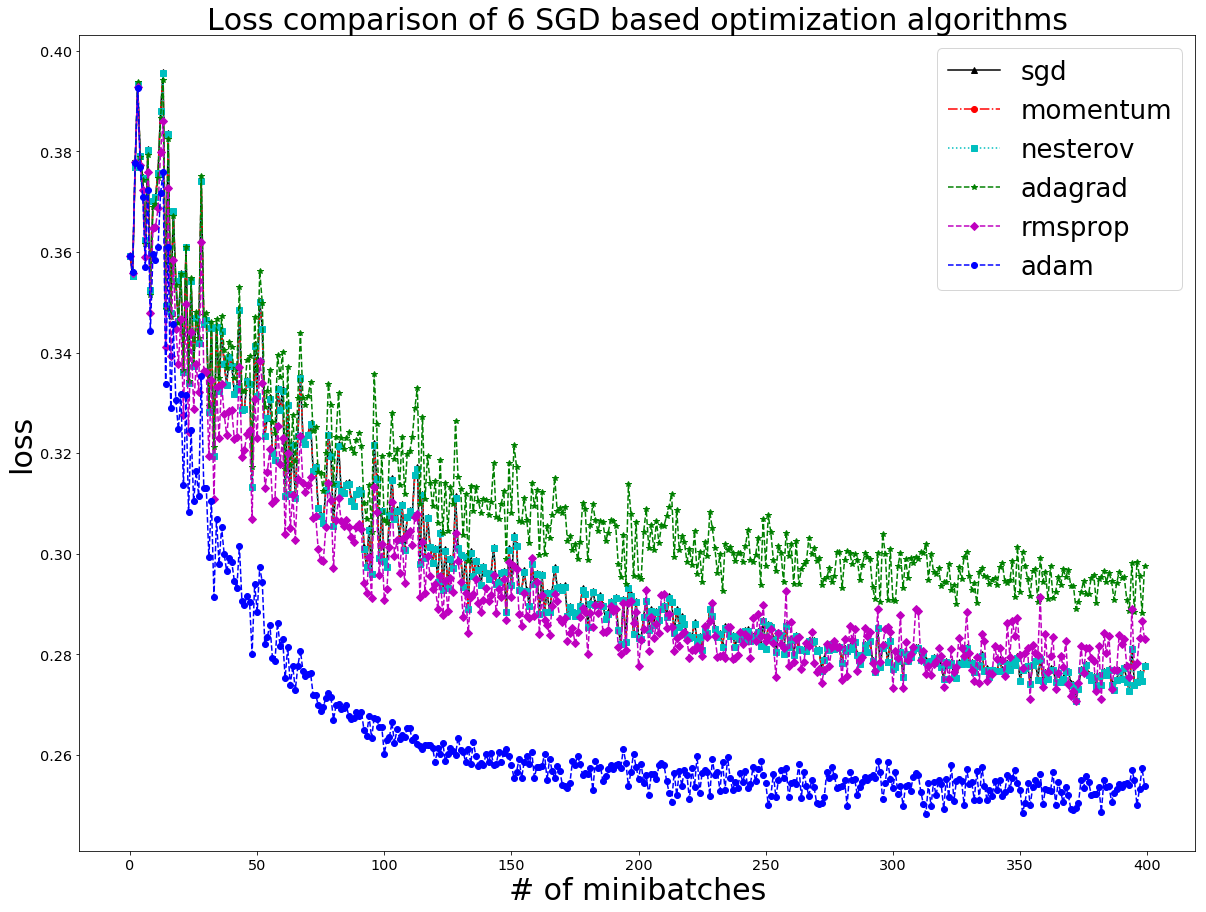

In [96]:
# plot the final resuluts together for better visualization
plt.clf
plt.plot(loss['sgd'], '-k^',label='sgd')
plt.plot(loss['momentum'], '-.ro',label='momentum')
plt.plot(loss['nesterov'], ':cs', label='nesterov')
plt.plot(loss['adagrad'], '--g*',label='adagrad')
plt.plot(loss['rmsprop'], '--mD', label='rmsprop')
plt.plot(loss['adam'],'--bo', label='adam')
plt.legend(loc='best', fontsize = 26)
plt.ylabel('loss', fontsize=30)
plt.xlabel('# of minibatches', fontsize = 30)
plt.title('Loss comparison of 6 SGD based optimization algorithms', fontsize = 30)
plt.show()

## This is the end of this code.